In [1]:
! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from deepctr.models import *
import deepctr
import csv

In [4]:
recipe_df = pd.read_csv('recipe_without_reviews.csv', low_memory=False)

In [7]:
meal_df = pd.read_csv('meal.csv')
user_recipe_df = pd.read_csv('user_recipe.csv')

In [249]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          508 non-null    int64  
 1   recipe_id           508 non-null    int64  
 2   recipe_name         508 non-null    object 
 3   review_nums         508 non-null    int64  
 4   category            508 non-null    object 
 5   aver_rate           508 non-null    float64
 6   image_url           508 non-null    object 
 7   ingredients         508 non-null    object 
 8   cooking_directions  508 non-null    object 
 9   nutritions          508 non-null    object 
 10  tags                508 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.8+ KB


In [252]:
user_recipe_df.recipe_id.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
151143    False
151144    False
151145    False
151146    False
151147    False
Name: recipe_id, Length: 151148, dtype: bool

In [8]:
recipe_df.head()

,Unnamed: 0,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...
2,2,6725,Honey Wheat Bread I,2054,appetizer,4.766846,http://images.media-allrecipes.com/userphotos/...,rapid rise yeast^white sugar^warm water (110 d...,{'directions': u'Prep\n25 m\nCook\n35 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",healthy;breads;dietary;low-cholesterol;healthy...
3,3,6730,Chocolate Chip Orange Zucchini Bread,503,dessert,4.674833,https://images.media-allrecipes.com/userphotos...,eggs^white sugar^vegetable oil^vanilla extract...,"{'directions': u'Sift together flour, baking p...","{u'niacin': {u'hasCompleteData': True, u'name'...",for-large-groups;healthy;breads;kid-friendly;d...
4,4,6732,Chocolate Chip Pumpkin Bread,866,dessert,4.718112,https://images.media-allrecipes.com/userphotos...,white sugar^pumpkin puree^vegetable oil^water^...,{'directions': u'Prep\n30 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",breads;fall;winter;seasonal;quick-breads;4-hou...


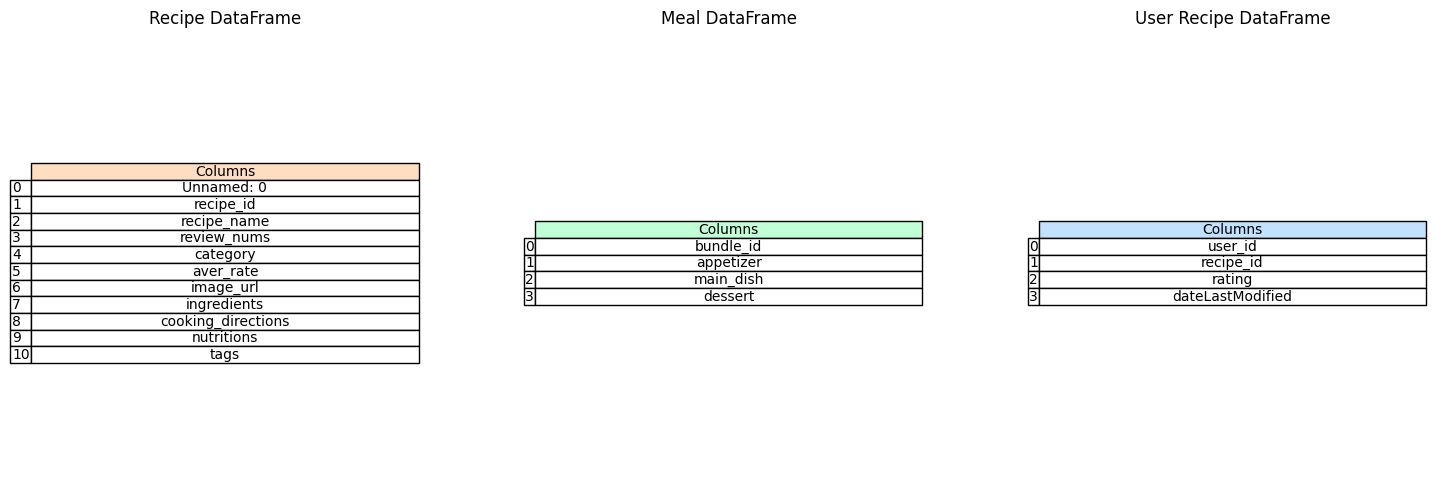

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas.plotting as pd_plotting
from pandas.plotting import table

recipe_columns = pd.DataFrame({'Columns': recipe_df.columns})
meal_columns = pd.DataFrame({'Columns': meal_df.columns})
user_recipe_columns = pd.DataFrame({'Columns': user_recipe_df.columns})


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors for backgrounds
colors = ['#FFDDC1', '#C1FFD7', '#C1E1FF']

# Recipe DataFrame columns
axes[0].axis('off')
axes[0].set_title('Recipe DataFrame')
table(axes[0], recipe_columns, cellLoc='center', loc='center', colColours=[colors[0]] * 1)

# Meal DataFrame columns
axes[1].axis('off')
axes[1].set_title('Meal DataFrame')
table(axes[1], meal_columns, cellLoc='center', loc='center', colColours=[colors[1]] * 1)

# User Recipe DataFrame columns
axes[2].axis('off')
axes[2].set_title('User Recipe DataFrame')
table(axes[2], user_recipe_columns, cellLoc='center', loc='center', colColours=[colors[2]] * 1)

plt.subplots_adjust(wspace=0.3)
plt.show()


In [248]:
#merging columns
df = user_recipe_df.merge(recipe_df, on='recipe_id')
df.head(4), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             19774 non-null  int64  
 1   recipe_id           19774 non-null  int64  
 2   rating              19774 non-null  int64  
 3   dateLastModified    19774 non-null  object 
 4   Unnamed: 0          19774 non-null  int64  
 5   recipe_name         19774 non-null  object 
 6   review_nums         19774 non-null  int64  
 7   category            19774 non-null  object 
 8   aver_rate           19774 non-null  float64
 9   image_url           19774 non-null  object 
 10  ingredients         19774 non-null  object 
 11  cooking_directions  19774 non-null  object 
 12  nutritions          19774 non-null  object 
 13  tags                19774 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ MB


(   user_id  recipe_id  rating           dateLastModified  Unnamed: 0  \
 0       39       7612       5  2004-08-02T16:48:37.107\n         101   
 1      240       7612       5  2000-12-30T12:33:35.733\n         101   
 2    34237       7612       5   2006-09-04T21:52:26.23\n         101   
 3    51226       7612       5  2002-09-05T13:02:57.403\n         101   
 
                        recipe_name  review_nums category  aver_rate  \
 0  Chocolate Lovers' Favorite Cake          848  dessert   4.683846   
 1  Chocolate Lovers' Favorite Cake          848  dessert   4.683846   
 2  Chocolate Lovers' Favorite Cake          848  dessert   4.683846   
 3  Chocolate Lovers' Favorite Cake          848  dessert   4.683846   
 
                                            image_url  \
 0  http://images.media-allrecipes.com/userphotos/...   
 1  http://images.media-allrecipes.com/userphotos/...   
 2  http://images.media-allrecipes.com/userphotos/...   
 3  http://images.media-allrecipes.com/user

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          19774 non-null  int64         
 1   recipe_id           19774 non-null  int64         
 2   recipe_name         19774 non-null  object        
 3   review_nums         19774 non-null  int64         
 4   category            19774 non-null  object        
 5   aver_rate           19774 non-null  float64       
 6   image_url           19774 non-null  object        
 7   ingredients         19774 non-null  object        
 8   cooking_directions  19774 non-null  object        
 9   nutritions          19774 non-null  object        
 10  tags                19774 non-null  object        
 11  user_id             19774 non-null  int64         
 12  rating              19774 non-null  int64         
 13  dateLastModified    19774 non-null  object    

In [11]:
df["datetime"] = pd.to_datetime(df['dateLastModified'], format="mixed")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.hour.unique()

array([16, 22, 19,  8,  9, 14,  7, 18, 10, 15,  6, 20, 13,  5, 11, 21,  0,
       12, 17,  2,  4, 23,  1,  3], dtype=int32)

## Combining nutritions with appropriate data type

In [20]:
df.nutritions[1]

"{u'niacin': {u'hasCompleteData': True, u'name': u'Niacin Equivalents', u'amount': 1.685838, u'percentDailyValue': u'13', u'displayValue': u'2', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': True, u'name': u'Sugars', u'amount': 19.18834, u'percentDailyValue': u'0', u'displayValue': u'19.2', u'unit': u'g'}, u'sodium': {u'hasCompleteData': True, u'name': u'Sodium', u'amount': 179.8308, u'percentDailyValue': u'7', u'displayValue': u'180', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': True, u'name': u'Carbohydrates', u'amount': 32.05494, u'percentDailyValue': u'10', u'displayValue': u'32.1', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': True, u'name': u'Vitamin B6', u'amount': 0.06311467, u'percentDailyValue': u'4', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': True, u'name': u'Calories', u'amount': 255.1692, u'percentDailyValue': u'13', u'displayValue': u'255', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': True, u'name': u'Thiamin', u'

### Percent Daily Value: This provides information on how much of the daily recommended intake of the nutrient is present in the food.
Hence, considering this value in determining the nutrition containment in the recipes

In [53]:
# converting the complex nutritions info to simple list of nutritions name

import ast

df['nutritions'] = df['nutritions'].apply(lambda x: ast.literal_eval(x))
df['nutritions']

0        {'niacin': {'hasCompleteData': True, 'name': '...
1        {'niacin': {'hasCompleteData': True, 'name': '...
2        {'niacin': {'hasCompleteData': True, 'name': '...
3        {'niacin': {'hasCompleteData': True, 'name': '...
4        {'niacin': {'hasCompleteData': True, 'name': '...
                               ...                        
19769    {'niacin': {'hasCompleteData': True, 'name': '...
19770    {'niacin': {'hasCompleteData': True, 'name': '...
19771    {'niacin': {'hasCompleteData': True, 'name': '...
19772    {'niacin': {'hasCompleteData': True, 'name': '...
19773    {'niacin': {'hasCompleteData': True, 'name': '...
Name: nutritions, Length: 19774, dtype: object

In [83]:
demo_nutrition = df['nutritions'][0]

def convert_percent_daily_value(value):
    if value == '-':
        return 0
    else:
        return int(value)


top_3 = sorted(demo_nutrition.items(), key=lambda x: convert_percent_daily_value(x[1]['percentDailyValue']), reverse=True)[:]
top_3 = [item[0] for item in top_3]

def get_top_3(nutritions):
  top_3 = sorted(demo_nutrition.items(), key=lambda x: convert_percent_daily_value(x[1]['percentDailyValue']), reverse=True)[:30]
  top_3 = [item[0] for item in top_3]
  return top_3

df['nutritions_list'] = df['nutritions'].apply(lambda x:get_top_3(x))
df['nutritions_list']

0        [folate, fat, thiamin, niacin, calories, iron,...
1        [folate, fat, thiamin, niacin, calories, iron,...
2        [folate, fat, thiamin, niacin, calories, iron,...
3        [folate, fat, thiamin, niacin, calories, iron,...
4        [folate, fat, thiamin, niacin, calories, iron,...
                               ...                        
19769    [folate, fat, thiamin, niacin, calories, iron,...
19770    [folate, fat, thiamin, niacin, calories, iron,...
19771    [folate, fat, thiamin, niacin, calories, iron,...
19772    [folate, fat, thiamin, niacin, calories, iron,...
19773    [folate, fat, thiamin, niacin, calories, iron,...
Name: nutritions_list, Length: 19774, dtype: object

In [84]:
# all nutrients
all_nutritions = [nutrition for sublist in df['nutritions_list'] for nutrition in sublist]
len(all_nutritions)

395480

In [85]:
nutrition_counts = collections.Counter(all_nutritions)
top_nutritions = nutrition_counts.most_common(50)

unique_nutritions = [nutrition[0] for nutrition in top_nutritions]

nutrition_frequencies = [nutrition[1] for nutrition in top_nutritions]
len( unique_nutritions)

20

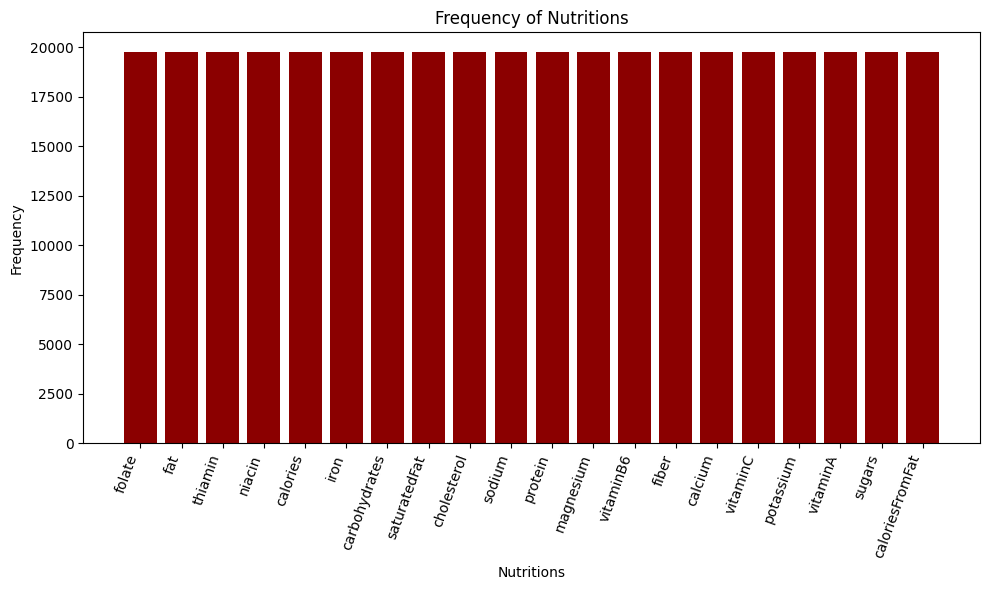

In [86]:
# visualizing the tags distribution in the recipes dataframe
plt.figure(figsize=(10,6))
plt.bar(unique_nutritions, nutrition_frequencies, color='darkred')
plt.xlabel('Nutritions')
plt.ylabel('Frequency')
plt.title('Frequency of Nutritions')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Since all nutritions are similar in all recipes, nutritions do not play any role in recommendation

## Appending the tags of each recipes in appropriate format

In [225]:
df['tags_list'] = df['tags'].apply(lambda x:x.split(';'))
df['tags_list']

0        [north-american, breads, easy, beginner-cook, ...
1        [north-american, breads, easy, beginner-cook, ...
2        [north-american, breads, easy, beginner-cook, ...
3        [north-american, breads, easy, beginner-cook, ...
4        [north-american, breads, easy, beginner-cook, ...
                               ...                        
19769    [60-minutes-or-less, for-large-groups, dessert...
19770    [60-minutes-or-less, for-large-groups, dessert...
19771    [60-minutes-or-less, for-large-groups, dessert...
19772    [60-minutes-or-less, for-large-groups, dessert...
19773    [60-minutes-or-less, for-large-groups, dessert...
Name: tags_list, Length: 19774, dtype: object

In [226]:
# getting all tags
all_tags = [tag for sublist in df['tags_list'] for tag in sublist]
len(all_tags)

242141

In [227]:
# getting tag counts
import collections
tag_counts = collections.Counter(all_tags)
# tag_counts -> returns 'stir-fry': 141,
#          'new-zealand': 5,
#          'tomatoes': 15,

In [228]:
top_tags = tag_counts.most_common(50)

unique_tags = [tag[0] for tag in top_tags]

tag_frequencies = [tag[1] for tag in top_tags]
len( unique_tags)

50

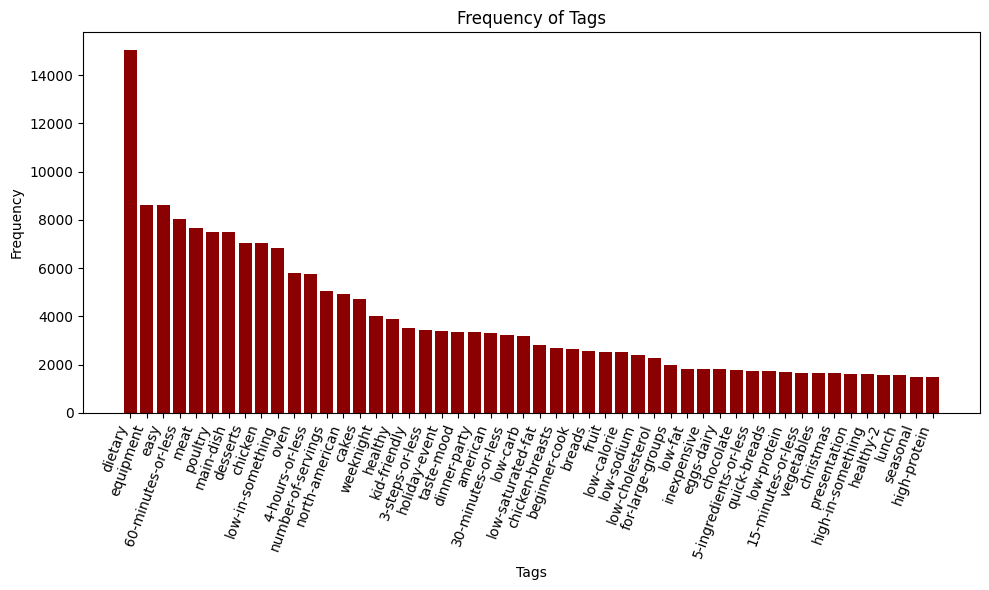

In [229]:
# visualizing the tags distribution in the recipes dataframe
plt.figure(figsize=(10,6))
plt.bar(unique_tags, tag_frequencies, color='darkred')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Tags')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Evaluating the diversity in cooking preparation

In [89]:
df['cooking_directions'][0]

"{'directions': u'Prep\\n20 m\\nCook\\n1 h\\nReady In\\n1 h 40 m\\nGrease and flour two 8 x 4 inch pans. Preheat oven to 325 degrees F (165 degrees C).\\nSift flour, salt, baking powder, soda, and cinnamon together in a bowl.\\nBeat eggs, oil, vanilla, and sugar together in a large bowl. Add sifted ingredients to the creamed mixture, and beat well. Stir in zucchini and nuts until well combined. Pour batter into prepared pans.\\nBake for 40 to 60 minutes, or until tester inserted in the center comes out clean. Cool in pan on rack for 20 minutes. Remove bread from pan, and completely cool.'}"

In [101]:
from nltk import pos_tag
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
def give_keywords(cooking_direction):

  tokens = word_tokenize(cooking_direction.lower())

  pos_tags = pos_tag(tokens)
  stop_words = set(stopwords.words('english'))

  selected_pos_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ']
  filtered_words = [word for word, pos_tag in pos_tags if word.isalnum() and word not in stop_words and pos_tag in selected_pos_tags]
  word_freq = Counter(filtered_words)

  # Select top keywords (e.g., top 5)
  top_keywords = word_freq.most_common(10)
  return [word for word, _ in top_keywords]

In [110]:
give_keywords(df['cooking_directions'][2]), give_keywords(df['cooking_directions'][500])

(['flour',
  'degrees',
  'minutes',
  'cool',
  'pan',
  'h',
  'x',
  'inch',
  'pans',
  'preheat'],
 ['minutes',
  'dough',
  'warm',
  'bowl',
  'let',
  'rise',
  'yeast',
  'cup',
  'water',
  'flour'])

In [111]:
df['cooking_words'] = df['cooking_directions'].apply(lambda x:give_keywords(x))
df['cooking_words']

0        [flour, degrees, minutes, cool, pan, h, x, inc...
1        [flour, degrees, minutes, cool, pan, h, x, inc...
2        [flour, degrees, minutes, cool, pan, h, x, inc...
3        [flour, degrees, minutes, cool, pan, h, x, inc...
4        [flour, degrees, minutes, cool, pan, h, x, inc...
                               ...                        
19769    [bowl, degrees, combine, large, beat, cream, c...
19770    [bowl, degrees, combine, large, beat, cream, c...
19771    [bowl, degrees, combine, large, beat, cream, c...
19772    [bowl, degrees, combine, large, beat, cream, c...
19773    [bowl, degrees, combine, large, beat, cream, c...
Name: cooking_words, Length: 19774, dtype: object

In [114]:
all_cooking_words = [cooking_word for sublist in df['cooking_words'] for cooking_word in sublist]
print(len(all_cooking_words))

cooking_word_counts = collections.Counter(all_cooking_words)

top_cooking_words = cooking_word_counts.most_common(50)

unique_cooking_words = [cooking_word[0] for cooking_word in top_cooking_words]

cooking_word_frequencies = [cooking_word[1] for cooking_word in top_cooking_words]
len( unique_cooking_words)

197633


50

In [127]:
# most common words in cooking directions

most_common_cooking_words = [word for word, _ in cooking_word_counts.most_common(10)]

In [138]:
# again, but deducing the most common words

def give_keywords(cooking_direction, discard_words = most_common_cooking_words):

  tokens = word_tokenize(cooking_direction.lower())

  pos_tags = pos_tag(tokens)
  stop_words = set(stopwords.words('english'))

  selected_pos_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ']
  filtered_words = [word for word, pos_tag in pos_tags if word.isalnum() and word not in stop_words and pos_tag in selected_pos_tags]

  filtered_words = [word for word in filtered_words if word not in discard_words]

  word_freq = Counter(filtered_words)

  # Select top keywords (e.g., top 5)
  top_keywords = word_freq.most_common(50)
  return [word for word, _ in top_keywords]

In [139]:
give_keywords(df['cooking_directions'][2], most_common_cooking_words), give_keywords(df['cooking_directions'][500], most_common_cooking_words)

(['cool',
  'pan',
  'x',
  'inch',
  'pans',
  'preheat',
  'c',
  'salt',
  'baking',
  'powder',
  'soda',
  'cinnamon',
  'eggs',
  'oil',
  'vanilla',
  'large',
  'add',
  'sifted',
  'ingredients',
  'creamed',
  'mixture',
  'stir',
  'zucchini',
  'nuts',
  'combined',
  'pour',
  'batter',
  'prepared',
  'inserted',
  'center',
  'comes',
  'clean',
  'rack',
  'remove',
  'bread'],
 ['dough',
  'warm',
  'let',
  'rise',
  'yeast',
  'cup',
  'water',
  'food',
  'processor',
  'bread',
  'knead',
  'place',
  'buttered',
  'cover',
  'plastic',
  'wrap',
  'half',
  'butter',
  'tops',
  'milk',
  'shortening',
  'honey',
  'salt',
  'wheat',
  'mixture',
  'rest',
  'add',
  'process',
  'forms',
  'ball',
  'processing',
  'additional',
  'seconds',
  'hand',
  'turn',
  'coat',
  'roll',
  'pound',
  'bubbles',
  'form',
  'loaves',
  'inch',
  'pans',
  'area',
  'doubled',
  'second',
  'take',
  'small',
  'pan',
  'bottom'])

In [213]:
df['cooking_words'] = df['cooking_directions'].apply(lambda x:give_keywords(x))
df['cooking_words']

0        [cool, pan, x, inch, pans, preheat, c, salt, b...
1        [cool, pan, x, inch, pans, preheat, c, salt, b...
2        [cool, pan, x, inch, pans, preheat, c, salt, b...
3        [cool, pan, x, inch, pans, preheat, c, salt, b...
4        [cool, pan, x, inch, pans, preheat, c, salt, b...
                               ...                        
19769    [combine, large, beat, cream, cheese, whipped,...
19770    [combine, large, beat, cream, cheese, whipped,...
19771    [combine, large, beat, cream, cheese, whipped,...
19772    [combine, large, beat, cream, cheese, whipped,...
19773    [combine, large, beat, cream, cheese, whipped,...
Name: cooking_words, Length: 19774, dtype: object

In [214]:
all_cooking_words = [cooking_word for sublist in df['cooking_words'] for cooking_word in sublist]
print(len(all_cooking_words))

cooking_word_counts = collections.Counter(all_cooking_words)

top_cooking_words = cooking_word_counts.most_common(30)

unique_cooking_words = [cooking_word[0] for cooking_word in top_cooking_words]

cooking_word_frequencies = [cooking_word[1] for cooking_word in top_cooking_words]
len( unique_cooking_words)

662126


30

In [215]:
cooking_word_counts.most_common(10)[::-1]

[('place', 7412),
 ('c', 7547),
 ('stir', 7827),
 ('add', 8272),
 ('large', 8751),
 ('inch', 9170),
 ('salt', 9439),
 ('baking', 9450),
 ('butter', 9839),
 ('mixture', 10054)]

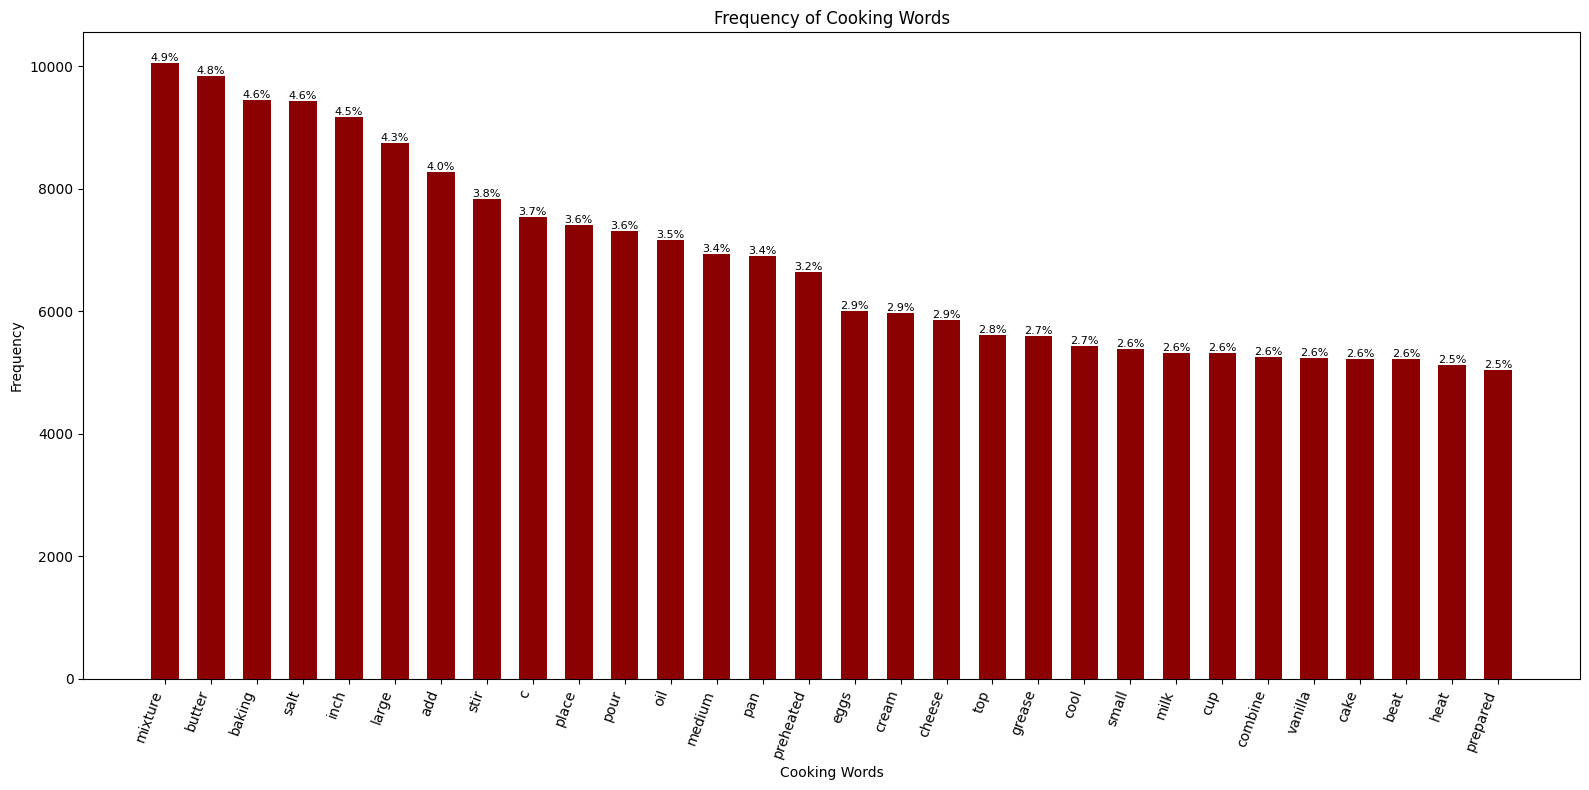

In [216]:
# Calculate total number of words
total_words = sum(cooking_word_frequencies)

# Calculate percentage of total words for each word
word_percentages = [(freq / total_words) * 100 for freq in cooking_word_frequencies]

# Plot
plt.figure(figsize=(16, 8))
bars = plt.bar(unique_cooking_words, cooking_word_frequencies, color='darkred', width=0.6)

for bar, percentage in zip(bars, word_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%',
             ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Cooking Words')
plt.ylabel('Frequency')
plt.title('Frequency of Cooking Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

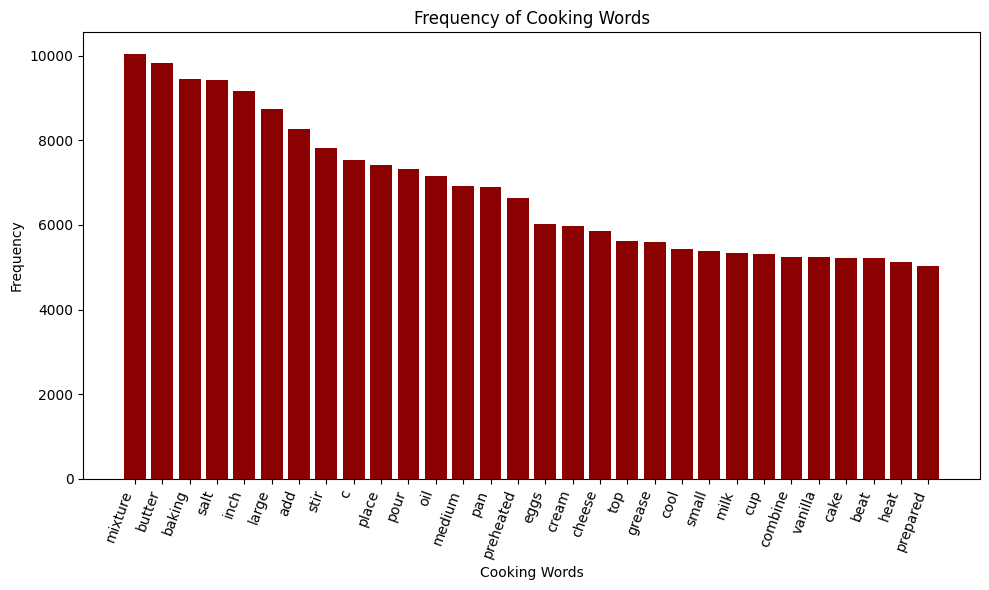

In [217]:
plt.figure(figsize=(10,6))
plt.bar(unique_cooking_words, cooking_word_frequencies, color='darkred')
plt.xlabel('Cooking Words')
plt.ylabel('Frequency')
plt.title('Frequency of Cooking Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df[['cooking_words']] = df[['cooking_words']].applymap(preprocess_)
df[['cooking_words']]

## Preprocessing the ingredients column

In [218]:
df['ingredients'][0]

'all-purpose flour^salt^baking soda^baking powder^ground cinnamon^eggs^vegetable oil^white sugar^vanilla extract^grated zucchini^chopped walnuts'

## Getting final df for construction of model

In [219]:
def preprocess_(row_list):
  """
  Returns the elements of list separated by '|'
  """
  temp =  '|'.join([item.strip() for item in row_list])
  return temp.replace(' ', '')

In [230]:
df['ingredients_list'] = df['ingredients'].apply(lambda x:x.split('^'))

all_ingredients_words = [ingredients_word for sublist in df['ingredients_list'] for ingredients_word in sublist]
print(len(all_ingredients_words))

ingredients_word_counts = collections.Counter(all_ingredients_words)

top_ingredients_words = ingredients_word_counts.most_common(50)

unique_ingredients_words = [ingredients_word[0] for ingredients_word in top_ingredients_words]

ingredients_word_frequencies = [ingredients_word[1] for ingredients_word in top_ingredients_words]
len( unique_ingredients_words)


174804


50

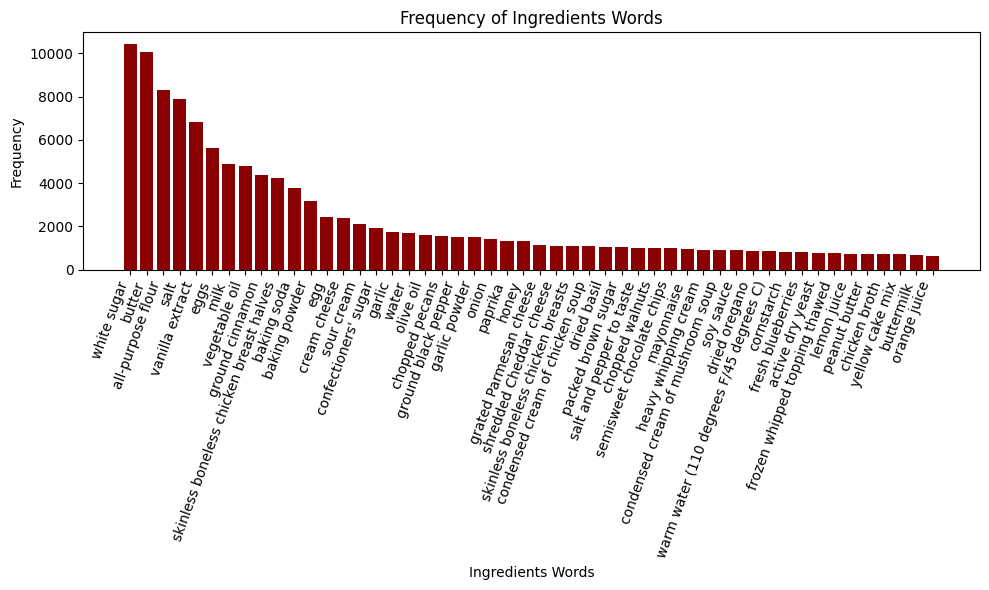

In [231]:
plt.figure(figsize=(10,6))
plt.bar(unique_ingredients_words, ingredients_word_frequencies, color='darkred')
plt.xlabel('Ingredients Words')
plt.ylabel('Frequency')
plt.title('Frequency of Ingredients Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

In [232]:
df[['ingredients_list']] = df[['ingredients_list']].applymap(preprocess_)
df[['tags_list']] = df[['tags_list']].applymap(preprocess_)
df[['ingredients_list']], df[['tags_list']]

(                                        ingredients_list
 0      all-purposeflour|salt|bakingsoda|bakingpowder|...
 1      all-purposeflour|salt|bakingsoda|bakingpowder|...
 2      all-purposeflour|salt|bakingsoda|bakingpowder|...
 3      all-purposeflour|salt|bakingsoda|bakingpowder|...
 4      all-purposeflour|salt|bakingsoda|bakingpowder|...
 ...                                                  ...
 19769  finelychoppedpecans|all-purposeflour|butter|cr...
 19770  finelychoppedpecans|all-purposeflour|butter|cr...
 19771  finelychoppedpecans|all-purposeflour|butter|cr...
 19772  finelychoppedpecans|all-purposeflour|butter|cr...
 19773  finelychoppedpecans|all-purposeflour|butter|cr...
 
 [19774 rows x 1 columns],
                                                tags_list
 0      north-american|breads|easy|beginner-cook|inexp...
 1      north-american|breads|easy|beginner-cook|inexp...
 2      north-american|breads|easy|beginner-cook|inexp...
 3      north-american|breads|easy|beginner

In [183]:
# df[['tags_list']] = df[['tags_list']].applymap(preprocess_)

# df[['cooking_words']] = df[['cooking_words']].applymap(preprocess_)

# df[['tags']].applymap(lambda x:preprocess(x.split(';')))

In [233]:
df.columns

Index(['Unnamed: 0', 'recipe_id', 'recipe_name', 'review_nums', 'category',
       'aver_rate', 'image_url', 'ingredients', 'cooking_directions',
       'nutritions', 'tags', 'user_id', 'rating', 'dateLastModified',
       'datetime', 'year', 'month', 'day', 'hour', 'nutritions_list',
       'tags_list', 'cooking_words', 'ingredients_list'],
      dtype='object')

In [234]:
df[['ingredients_list', 'cooking_words', 'tags_list']]

,ingredients_list,cooking_words,tags_list
0,all-purposeflour|salt|bakingsoda|bakingpowder|...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,north-american|breads|easy|beginner-cook|inexp...
1,all-purposeflour|salt|bakingsoda|bakingpowder|...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,north-american|breads|easy|beginner-cook|inexp...
2,all-purposeflour|salt|bakingsoda|bakingpowder|...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,north-american|breads|easy|beginner-cook|inexp...
3,all-purposeflour|salt|bakingsoda|bakingpowder|...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,north-american|breads|easy|beginner-cook|inexp...
4,all-purposeflour|salt|bakingsoda|bakingpowder|...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,north-american|breads|easy|beginner-cook|inexp...
...,...,...,...
19769,finelychoppedpecans|all-purposeflour|butter|cr...,combine|large|beat|cream|cheese|whipped|toppin...,60-minutes-or-less|for-large-groups|desserts|e...
19770,finelychoppedpecans|all-purposeflour|butter|cr...,combine|large|beat|cream|cheese|whipped|toppin...,60-minutes-or-less|for-large-groups|desserts|e...
19771,finelychoppedpecans|all-purposeflour|butter|cr...,combine|large|beat|cream|cheese|whipped|toppin...,60-minutes-or-less|for-large-groups|desserts|e...
19772,finelychoppedpecans|all-purposeflour|butter|cr...,combine|large|beat|cream|cheese|whipped|toppin...,60-minutes-or-less|for-large-groups|desserts|e...


In [235]:
final_df = df[['user_id', 'rating', 'recipe_id','recipe_name', 'tags_list', 'cooking_words', 'aver_rate']]
final_df.head(2)

,user_id,rating,recipe_id,recipe_name,tags_list,cooking_words,aver_rate
0,4796,5,6698,Mom's Zucchini Bread,north-american|breads|easy|beginner-cook|inexp...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,4.754207
1,34237,5,6698,Mom's Zucchini Bread,north-american|breads|easy|beginner-cook|inexp...,cool|pan|x|inch|pans|preheat|c|salt|baking|pow...,4.754207


In [238]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        19774 non-null  int64  
 1   rating         19774 non-null  int64  
 2   recipe_id      19774 non-null  int64  
 3   recipe_name    19774 non-null  object 
 4   tags_list      19774 non-null  object 
 5   cooking_words  19774 non-null  object 
 6   aver_rate      19774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [253]:
final_df.to_csv('final_dataframe.csv')